In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, metrics
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#import yellowbrick
#from yellowbrick.classifier import ROCAUC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [39]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)

In [40]:
clf.score(X_test, y_test)

0.9666666666666667

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      0.92      0.96        13
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



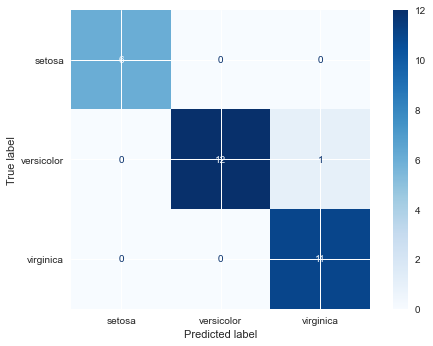

In [41]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions, target_names = load_iris().target_names))

#confusion_matrix(y_test, predictions)
plot_confusion_matrix(
    clf, X_test, y_test, cmap=plt.cm.Blues,
    display_labels=load_iris().target_names)
plt.show()

#metrics.plot_roc_curve(clf, X_test, y_test)  
#plt.show()  

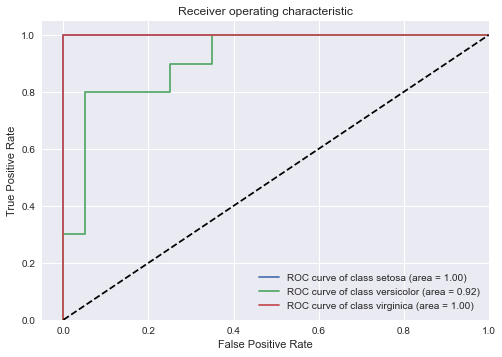

In [42]:
#
#Andrea PIERRÉ's code below; used to visualize roc curves for ternary classification
#
plt.style.use("seaborn")
classes_names = load_iris().target_names

iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2)

classifier = OneVsRestClassifier(clf)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_i in enumerate(classes_names):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i, class_i in enumerate(classes_names):
    plt.plot(
        fpr[i], tpr[i], label=f"ROC curve of class {class_i} (area = {roc_auc[i]:.2f})"
    )
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()